# Stat 133
# Homework 9

## Part I

In [9]:
library(DataComputing)
library(rvest)
library(lubridate)
page = "List_of_nuclear_reactors"
xpath = '//*[@id="mw-content-text"]/table' 
table_list <- page %>%
  read_html() %>%
  html_nodes(xpath = xpath) %>%
  html_table(fill = TRUE)

### Find the table element

In [10]:
table <- table_list[[23]]
head(table)

,Name,Reactor No.,Reactor,NA,Status,Capacity in MW,NA,Construction Start Date,Commercial Operation Date,Closure
1,Type,Model,Net,Gross,NA,NA,NA,NA,NA,NA
2,Fukushima Daiichi,1,BWR,BWR-3,Inoperable,439,460,25 July 1967,26 March 1971,19 May 2011
3,Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,784,9 June 1969,18 July 1974,19 May 2011
4,Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,784,28 December 1970,27 March 1976,19 May 2011
5,Fukushima Daiichi,4,BWR,BWR-4,Shut down/ Inoperable,760,784,12 February 1973,12 October 1978,19 May 2011
6,Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,784,22 May 1972,18 April 1978,17 December 2013


In [11]:
names(table)

[1] "Name"                      "Reactor No."              
 [3] "Reactor"                   NA                         
 [5] "Status"                    "Capacity in MW"           
 [7] NA                          "Construction Start Date"  
 [9] "Commercial Operation Date" "Closure"

### Look at it using View()

In [13]:
new_names <- c("name", "reactor_no", "type", "model",
               "status", "net", "gross", "construction_start",
               "operation_start", "closure")
names(table) <- new_names
table <- table %>% filter(row_number() != 1)
head(table)


,name,reactor_no,type,model,status,net,gross,construction_start,operation_start,closure
1,Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,784,9 June 1969,18 July 1974,19 May 2011
2,Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,784,28 December 1970,27 March 1976,19 May 2011
3,Fukushima Daiichi,4,BWR,BWR-4,Shut down/ Inoperable,760,784,12 February 1973,12 October 1978,19 May 2011
4,Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,784,22 May 1972,18 April 1978,17 December 2013
5,Fukushima Daiichi,6,BWR,BWR-5,Shut down,1067,1100,26 October 1973,24 October 1979,17 December 2013
6,Fukushima Daini,1,BWR,BWR-5,Operation suspended,1067,1100,16 March 1976,20 April 1982,


### A quick visualization

Warning message:
: Too few values at 3 locations: 20, 21, 22Warning message:
: Removed 3 rows containing missing values (geom_point).

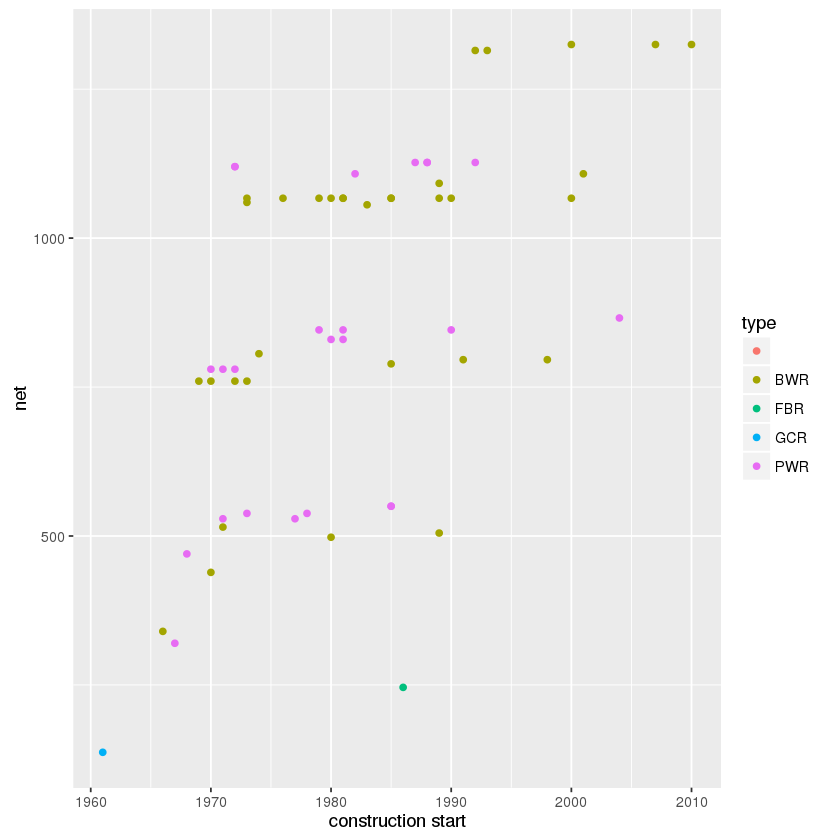

In [15]:
table %>% 
  separate(construction_start, into=c("day", "month", "year"), sep=" ") %>%
  mutate(year=as.numeric(year)) %>%
  ggplot(aes(y=net, x=year, color=type)) + geom_point() + labs(x="construction start")

### Construction delays

Warning message:
: Too few values at 3 locations: 20, 21, 22Warning message:
: Too few values at 5 locations: 20, 21, 22, 41, 51Warning message:
: Removed 5 rows containing missing values (geom_segment).

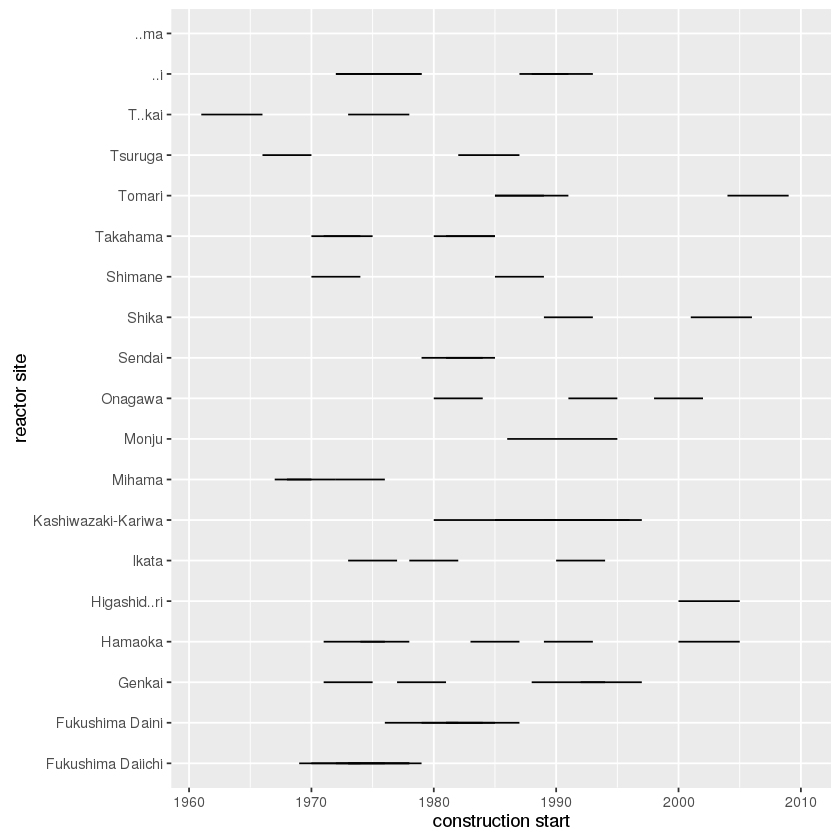

In [16]:
table %>% 
  separate(construction_start, into=c("day1", "month1", "year1"), sep=" ") %>%
  separate(operation_start, into=c("day2", "month2", "year2"), sep=" ") %>%
  mutate(year1=as.numeric(year1), year2=as.numeric(year2)) %>%
  ggplot() + geom_segment(aes(x=year1, xend=year2, y=name, yend=name)) + labs(x="construction start", y="reactor site")

## Part II


```bash
ls
less lifeexpectancy.csv
wc -l lifeexpectancy.csv
head -1 lifeexpectancy.csv #column 152, 177, 202
cut -f 1,152,177,202 -d ',' lifeexpectancy.csv
cut -f 1,152,177,202 -d ',' lifeexpectancy.csv | egrep "[0-9]" > lifeexpectancy.clean.csv
R CMD BATCH makemaps-1.R lifeexpectancy.clean.csv | tee message.txt
ls plots
```